In [10]:
import json
import numpy as np
from sklearn.cluster import KMeans

# Load embeddings from the JSON files
embedding_files = ['eiffel_tower.json', 'embeddings.json', 'world_war.json']

all_embeddings = []
file_names = []  # To store the corresponding file names

# Iterate through each file and load its content
for file in embedding_files:
    with open(file, 'r') as f:
        data = json.load(f)  # Load the data from each file
        
        # Add embeddings and file names
        embeddings = np.array([item['embedding'] for item in data])  # Extract 'embedding' key
        all_embeddings.append(embeddings)  # Add the embeddings
        file_names.extend([item['file_name'] for item in data])  # Store file names

# Combine all embeddings into a single array
all_embeddings = np.concatenate(all_embeddings, axis=0)

# Check the shape of the combined embeddings
print("Combined embeddings shape:", all_embeddings.shape)


Combined embeddings shape: (40, 1536)


In [2]:
from sklearn.cluster import KMeans

# Apply k-means clustering with 2 clusters (Churchill vs Havel)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(all_embeddings)

# Check the cluster assignments
print(clusters)

[2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1
 1 1 1]


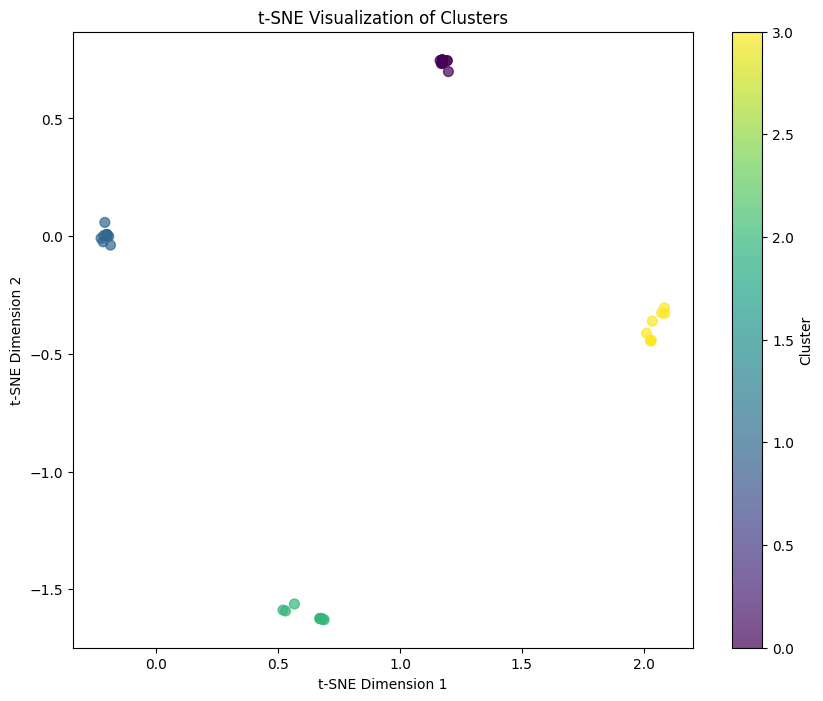

In [3]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Apply t-SNE to reduce the dimensionality of the embeddings
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(all_embeddings)

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)

# Add labels and title
plt.title("t-SNE Visualization of Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

# Show the plot
plt.colorbar(label='Cluster')
plt.show()


In [11]:
# Now print the clusters with the corresponding filenames
for cluster_num in range(4):  # Assuming there are 4 clusters
    cluster_members = [file_names[idx] for idx in range(len(clusters)) if clusters[idx] == cluster_num]
    print(f"Cluster {cluster_num}: {cluster_members}")


Cluster 0: ['churchill1.txt', 'churchill10.txt', 'churchill2.txt', 'churchill3.txt', 'churchill4.txt', 'churchill5.txt', 'churchill6.txt', 'churchill7.txt', 'churchill8.txt', 'churchill9.txt']
Cluster 1: ['world_war.txt', 'world_war10.txt', 'world_war2.txt', 'world_war3.txt', 'world_war4.txt', 'world_war5.txt', 'world_war6.txt', 'world_war7.txt', 'world_war8.txt', 'world_war9.txt']
Cluster 2: ['eiffel_tower1.txt', 'eiffel_tower10.txt', 'eiffel_tower2.txt', 'eiffel_tower3.txt', 'eiffel_tower4.txt', 'eiffel_tower5.txt', 'eiffel_tower6.txt', 'eiffel_tower7.txt', 'eiffel_tower8.txt', 'eiffel_tower9.txt']
Cluster 3: ['havel1.txt', 'havel10.txt', 'havel2.txt', 'havel3.txt', 'havel4.txt', 'havel5.txt', 'havel6.txt', 'havel7.txt', 'havel8.txt', 'havel9.txt']
